# Color Analysis of Movie Posters using K-means Clustering

This goal of this section of the project is to analyze the color features of movie posters, specifically, the distribution of pixel values of different genres of movies. This notebook serves to provide the necessary steps (data scraping, cleaning/storage, and code for the analysis. This analysis is inspired by a GitHub project that used k-means clustering to create color bars and image segmentations from the pixel data of movie posters. <br>

Reference: https://github.com/yujingma45/Kmeans_Movie

In [1]:
# Libraries
import os
import shutil
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from bs4 import BeautifulSoup
from urllib.request import urlretrieve
from PIL import Image
from scipy.spatial.distance import euclidean

# Scraping Data


The poster images are sourced from urls provided in CSV file on a Kaggle data-set. Six movie genres (horror, romance, drama, fantasy, documentary, sci-fi) were selected for the analysis. Many movie titles were classified in multiple genre categories; for simplicity, we selected posters that were labeled with a single genre, out of our genres of interest. For each genre, we retrieved roughly 30 images (number of posters per genre was not uniform, some urls were invalid links).

In [2]:
# Data sourced from Kaggle: https://www.kaggle.com/neha1703/movie-genre-from-its-poster#MovieGenre.csv
path = "../data/MovieGenre.csv"
movies_df = pd.read_csv(path, encoding = "ISO-8859-1").dropna()

In [3]:
# Function from scraping poster images from urls
def retrieve_poster(ids, urls, data_path, num_imgs):
    for i in range(num_imgs):
        try:
            urlretrieve(urls[i], data_path + str(ids[i]) + ".jpg")
        except Exception as e:
            continue

In [4]:
data_path = "../data/posters/"
genres = ["horror", "romance", "drama", "fantasy", "documentary", "sci-fi"]

# for genre in genres:
#    ids = movies_df[movies_df["Genre"] == genre]["imdbId"].values
#    urls = movies_df[movies_df["Genre"] == genre]["Poster"].values
#    retrieve_poster(ids, urls, data_path + genre + "/", 30)

# Inspect images

The posters for each genre (`horror`, `romance`, `drama`, `fantasy`, `documentary`, and `sci-fi`) were stored in there own directories. Below, 10 posters from each genre are displayed.

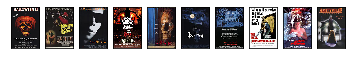

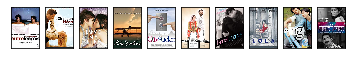

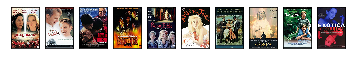

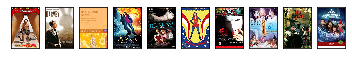

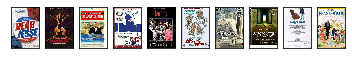

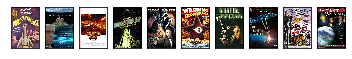

In [5]:
# Show a sample of images
def show_images(genres):
    for genre in genres:
        GENRE_PATH = data_path + genre + "/"
        for i in range(10):
            plt.subplot(1,10,i+1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            img = mpimg.imread(GENRE_PATH + os.listdir(GENRE_PATH)[i])
            plt.imshow(img)
        plt.show()

show_images(genres)

# Color Selection using K-Means Clustering

Each poster contains many colors (can be in the range of thousands to ten-thousand). The RGB colors have 3 channels, each with possible values ranging from 0 to 255 (256^3 = 16777216 possible colors). Rather than perform an analysis on every single possible color, we should generalize them into a few categories. Specifically, we could group colors that are slightly different shades of a base color (light blue, navy blue in the blue group). By defining a basic set of colors, we can use K-means clustering to group all other colors into a color in the set. The common colors were chosen on intuition; we included base colors (black, white, red, lime, blue), which are the extremes of each channel (RGB), and selected a few other colors we believed would be commonly used.

In [6]:
# 12 common colors
color_dict = {
    "black": (0, 0, 0),
    "white": (255, 255, 255),
    "red": (255, 0, 0),
    "lime": (0, 255, 0),
    "blue": (0, 0, 255),
    "yellow": (255, 255, 0),
    "gray": (128, 128, 128),
    "purple": (128, 0, 128),
    "orange": (255, 165, 0),
    "silver": (192, 192, 192),
    "brown": (165, 42, 42),
    "maroon": (128, 0, 0)
}

centroid_names = [color for color in color_dict.keys()]
centroids = [np.array(color_dict[color]) for color in list(color_dict.keys())]

In [7]:
def kmeans(img_path, centroids, centroid_names, thumb_factor):
    
    centroid_dict = {}
    for cen in centroids:
        centroid_dict[str(cen)] = 0
        
    for i in os.listdir(img_path):
        img = Image.open(img_path + "/" + i)
        img.thumbnail((img.size[0]//thumb_factor, img.size[1]//thumb_factor))
        colors = np.array([np.array([i, np.array(j)]) for i, j in img.getcolors(img.size[0]*img.size[1])])
        
        for col in colors:
            dist1 = (str(centroids[0]), euclidean(col[1], centroids[0]), col[0])
            dist2 = (str(centroids[1]), euclidean(col[1], centroids[1]), col[0])
            dist3 = (str(centroids[2]), euclidean(col[1], centroids[2]), col[0])
            dist4 = (str(centroids[3]), euclidean(col[1], centroids[3]), col[0])
            dist5 = (str(centroids[4]), euclidean(col[1], centroids[4]), col[0])
            dist6 = (str(centroids[5]), euclidean(col[1], centroids[5]), col[0])
            dist7 = (str(centroids[6]), euclidean(col[1], centroids[6]), col[0])
            dist8 = (str(centroids[7]), euclidean(col[1], centroids[7]), col[0])
            dist9 = (str(centroids[8]), euclidean(col[1], centroids[8]), col[0])
            dist10 = (str(centroids[9]), euclidean(col[1], centroids[9]), col[0])
            dist11 = (str(centroids[10]), euclidean(col[1], centroids[10]), col[0])
            dist12 = (str(centroids[11]), euclidean(col[1], centroids[11]), col[0])

            distances = sorted([dist1, dist2, dist3, dist4, 
                                dist5, dist6, dist7, dist8, 
                                dist9, dist10, dist11, dist12], key=lambda x: x[1])
        
            centroid_dict[distances[0][0]] += distances[0][2]
        
    counts_dict = {}
    for idx in range(len(centroid_names)):
        counts_dict[centroid_names[idx]] = centroid_dict[list(centroid_dict.keys())[idx]] // len(os.listdir(img_path))
        
    return pd.Series(counts_dict, index=counts_dict.keys())

**Horror Movies Plot**

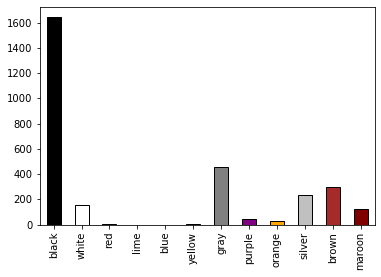

In [8]:
horror_colors = kmeans("../data/posters/horror/", centroids, centroid_names, 4)
horror_colors.plot(kind="bar", color=centroid_names, edgecolor="black")

**Romance Movies Plot**

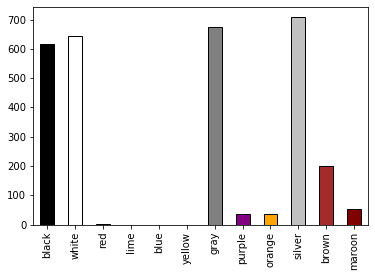

In [9]:
romance_colors = kmeans("../data/posters/romance/", centroids, centroid_names, 4)
romance_colors.plot(kind="bar", color=centroid_names, edgecolor="black")

**Drama Movies Plot**

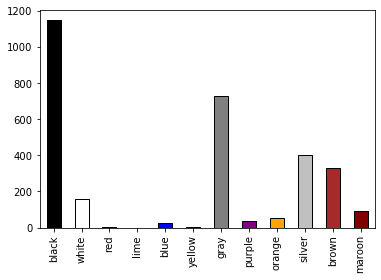

In [10]:
drama_colors = kmeans("../data/posters/drama/", centroids, centroid_names, 4)
drama_colors.plot(kind="bar", color=centroid_names, edgecolor="black")

**Fantasy Movies Plot**

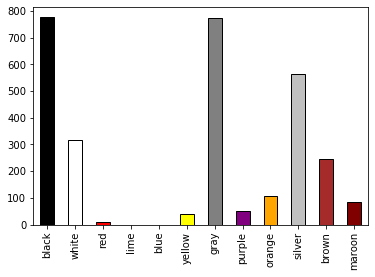

In [11]:
fantasy_colors = kmeans("../data/posters/fantasy/", centroids, centroid_names, 4)
fantasy_colors.plot(kind="bar", color=centroid_names, edgecolor="black")

**Documentary Movies Plot**

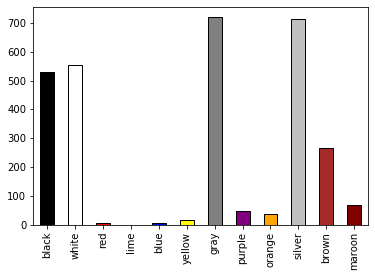

In [12]:
documentary_colors = kmeans("../data/posters/documentary/", centroids, centroid_names, 4)
documentary_colors.plot(kind="bar", color=centroid_names, edgecolor="black")

**Sci-fi Movies Plot**

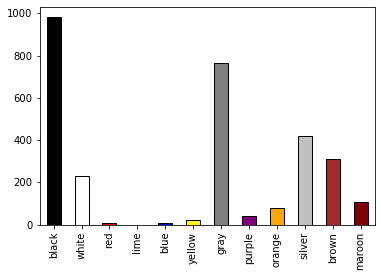

In [13]:
scifi_colors = kmeans("../data/posters/sci-fi/", centroids, centroid_names, 4)
scifi_colors.plot(kind="bar", color=centroid_names, edgecolor="black")

The color black (and colors clustered with black, according to Euclidean distance of RGB channels) appears to be common across all of the genres, but it dominates in the `horror` posters. This is actually very plausible and makes a lot of sense because horror movies are typically distinguished by very dark elements/sentiments; it is very reasonable that black is the predominant color in the posters. The `romance` barplot was surprising; specifically, we expected more colors in the red category (red and its shades are typically associated with romance). However, it is possible that the sample used simply did not contain that much red colors. The `fantasy`, `drama`, and `sci-fi` genres share a similar distribution of colors; we believe that this could be attributed to the possibility that fantasy, drama, and sci-fi films share common elements in terms of visuals and settings, which would lead to similar color choices for their posters. The `documentary` genre seems to exhibit ties between black, white, silver, and gray, sharing a similar distribution with `romance`.

# Modified model

To experiment with the clustering method, we modified the model to only use the very basic colors, that is, the colors that take the extreme values in each RGB channel (`black (0, 0, 0)`, `white (255, 255, 255)`, `red (255, 0, 0)`, `lime (0, 255, 0)`, and `blue (0, 0, 255)`.

In [14]:
# 5 Base colors
basic_colors = {
    "black": (0, 0, 0),
    "white": (255, 255, 255),
    "red": (255, 0, 0),
    "lime": (0, 255, 0),
    "blue": (0, 0, 255),
}

basic_centroid_names = [color for color in basic_colors.keys()]
basic_centroids = [np.array(basic_colors[color]) for color in list(basic_colors.keys())]

In [15]:
def basic_kmeans(img_path, centroids, centroid_names, thumb_factor):
    
    centroid_dict = {}
    for cen in centroids:
        centroid_dict[str(cen)] = 0
        
    for i in os.listdir(img_path):
        img = Image.open(img_path + "/" + i)
        img.thumbnail((img.size[0]//thumb_factor, img.size[1]//thumb_factor))
        colors = np.array([np.array([i, np.array(j)]) for i, j in img.getcolors(img.size[0]*img.size[1])])
        
        for col in colors:
            dist1 = (str(centroids[0]), euclidean(col[1], centroids[0]), col[0])
            dist2 = (str(centroids[1]), euclidean(col[1], centroids[1]), col[0])
            dist3 = (str(centroids[2]), euclidean(col[1], centroids[2]), col[0])
            dist4 = (str(centroids[3]), euclidean(col[1], centroids[3]), col[0])
            dist5 = (str(centroids[4]), euclidean(col[1], centroids[4]), col[0])
    
            distances = sorted([dist1, dist2, dist3, dist4, dist5], key=lambda x: x[1])
        
            centroid_dict[distances[0][0]] += distances[0][2]
        
    counts_dict = {}
    for idx in range(len(centroid_names)):
        counts_dict[centroid_names[idx]] = centroid_dict[list(centroid_dict.keys())[idx]] // len(os.listdir(img_path))
        
    return pd.Series(counts_dict, index=counts_dict.keys())

**Horror Movies Plot (Basic Colors)**

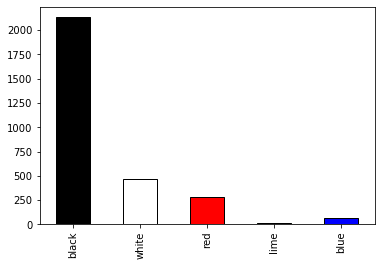

In [16]:
horror_colors_basic = basic_kmeans("../data/posters/horror/", basic_centroids, basic_centroid_names, 4)
horror_colors_basic.plot(kind="bar", color=basic_centroid_names, edgecolor="black")

**Romance Movies Plot (Basic Colors)**

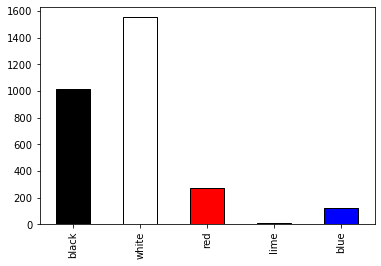

In [17]:
romance_colors_basic = basic_kmeans("../data/posters/romance/", basic_centroids, basic_centroid_names, 4)
romance_colors_basic.plot(kind="bar", color=basic_centroid_names, edgecolor="black")

**Drama Movies Plot (Basic Colors)**

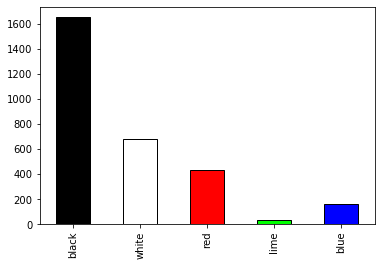

In [18]:
drama_colors_basic = basic_kmeans("../data/posters/drama/", basic_centroids, basic_centroid_names, 4)
drama_colors_basic.plot(kind="bar", color=basic_centroid_names, edgecolor="black")

**Fantasy Movies Plot (Basic Colors)**

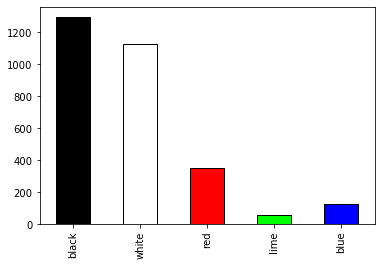

In [19]:
fantasy_colors_basic = basic_kmeans("../data/posters/fantasy/", basic_centroids, basic_centroid_names, 4)
fantasy_colors_basic.plot(kind="bar", color=basic_centroid_names, edgecolor="black")

**Documentary Movies Plot (Basic Colors)**

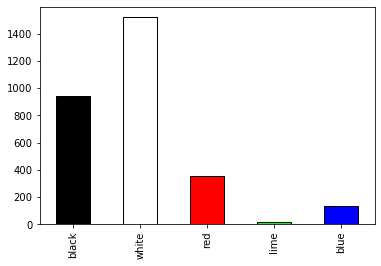

In [20]:
documentary_colors_basic = basic_kmeans("../data/posters/documentary/", basic_centroids, basic_centroid_names, 4)
documentary_colors_basic.plot(kind="bar", color=basic_centroid_names, edgecolor="black")

**Sci-fi Movies Plot (Basic Colors)**

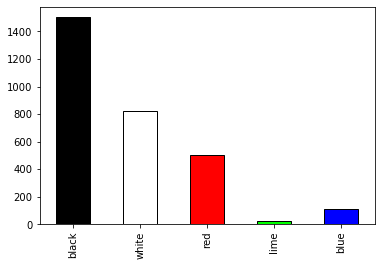

In [21]:
scifi_colors_basic = basic_kmeans("../data/posters/sci-fi/", basic_centroids, basic_centroid_names, 4)
scifi_colors_basic.plot(kind="bar", color=basic_centroid_names, edgecolor="black")

The displays for the 5 most basic colors are similar in terms of the distributions to the previous charts. Black seems to still be very common and is the dominant color in the horror genre. The fantasy, sci-fi, and drama posters have similar color distributions, and the documentary graph has some semblance to the romance graph.

# Discussion & Future Work

This particular use of clustering to analyze the features was very different from a typical use-case of clustering. To describe the process concretely, this clustering was essentially supervised (as opposed to typically using clustering as an unsupervised learning method) since we knew exactly which clusters we want to use. We did not need to run multiple iterations because doing so may change the clusters. This was an interesting process because it focused more on the image analysis to find features than the use of machine learning (in this case, clustering) to solve a classification problem.

The work following this would be to retrieve more examples for each genre. One of the drawbacks of using a lot of data is that it takes very long to compute with the methods above. However, having more data would give us better insights on the pixel distributions and may produce results that are more representative of each individual genre.